# Image Data Mining: LBP

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
import numpy as np

# Function to read images and convert them to grayscale
def read_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image


In [3]:
# Function to perform LBP
def lbp_histogram(image, points, radius, method='uniform'):
    lbp = local_binary_pattern(image, points, radius, method)
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, points + 3), range=(0, points + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

In [4]:
# Paths of the images
image_paths = ['/content/Image1.png', '/content/Image2.png', '/content/Image3.png']

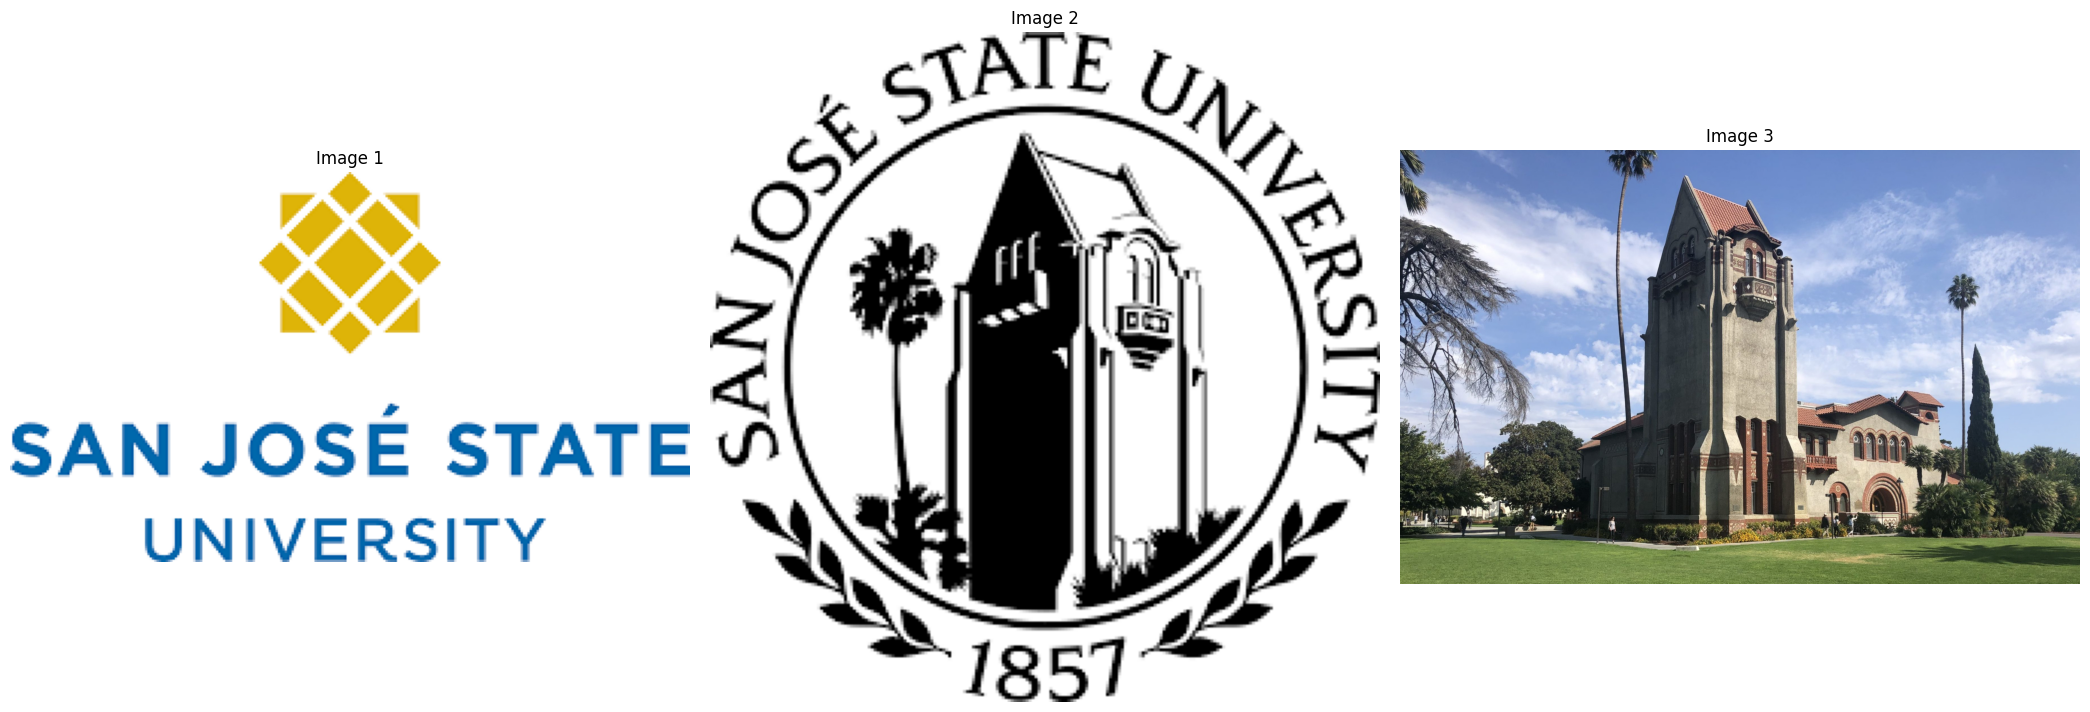

In [11]:
# Load images
image1 = cv2.imread('/content/Image1.png')
image2 = cv2.imread('/content/Image2.png')
image3 = cv2.imread('/content/Image3.png')

# Convert the images from BGR to RGB because OpenCV loads images in BGR
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(21, 7))

# Display Image 1
plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.title('Image 1')
plt.axis('off')

# Display Image 2
plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.title('Image 2')
plt.axis('off')

# Display Image 3
plt.subplot(1, 3, 3)
plt.imshow(image3_rgb)
plt.title('Image 3')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Parameters for LBP
radius = 3
n_points = 8 * radius


In [6]:
# Dictionary to store histograms
histograms = {}

In [7]:
# Reading the images and computing LBP histograms
for i, path in enumerate(image_paths):
    gray_image = read_and_convert_to_grayscale(path)
    histograms[f'Image{i+1}'] = lbp_histogram(gray_image, n_points, radius)

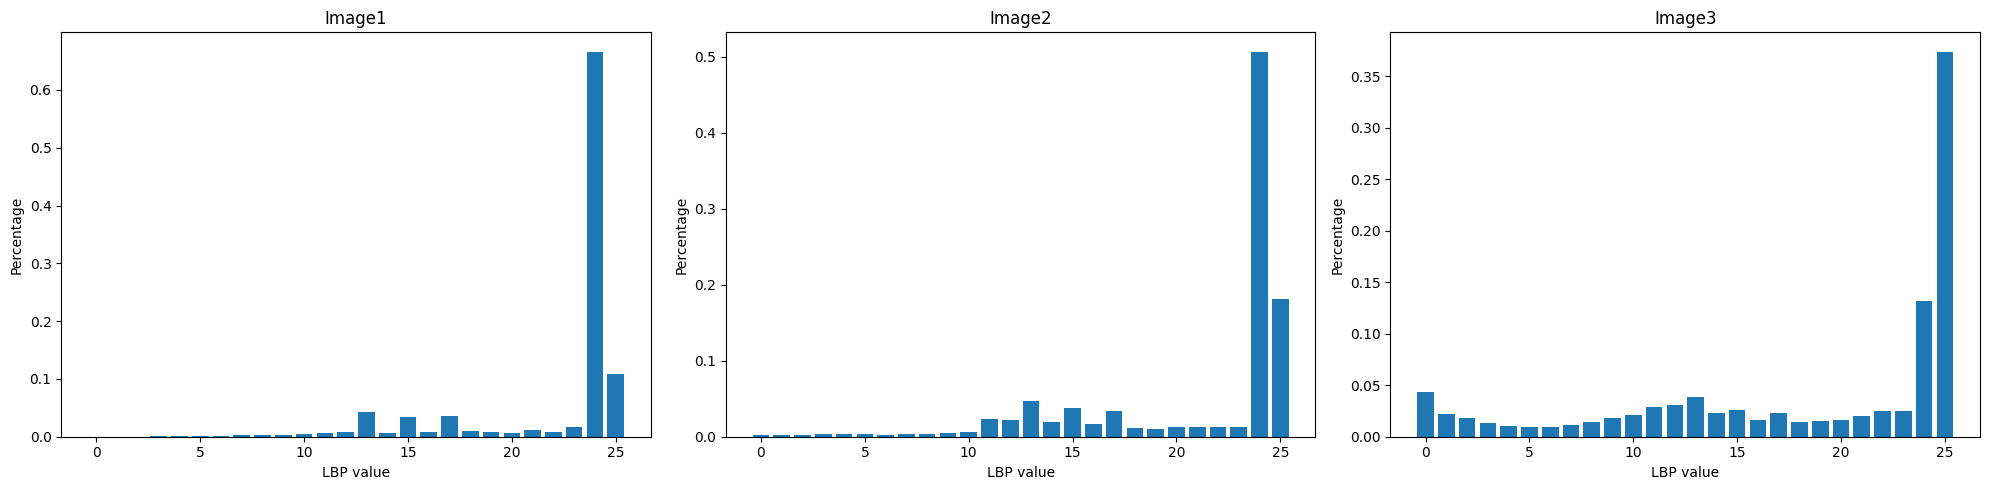

In [8]:
# Plotting the histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (image_name, hist) in enumerate(histograms.items()):
    axes[i].bar(range(len(hist)), hist)
    axes[i].set_title(image_name)
    axes[i].set_xlabel('LBP value')
    axes[i].set_ylabel('Percentage')
plt.tight_layout()
plt.show()